In [299]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
NNH = KNeighborsClassifier(n_neighbors= 5 )

# Q1) Import and store the data in a data frame.

In [300]:
bc_dataFrame = pd.read_csv("wisc_bc_data.csv")
bc_dataFrame.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [301]:
bc_dataFrame.shape

(569, 32)

In [302]:
bc_dataFrame.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

# Q2)Remove the outliers from the data

In [303]:
bc_dataFrame_Filter = bc_dataFrame.drop(labels=["id","diagnosis"], axis=1)
bc_dataFrame_Filter.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [304]:
bc_dataFrame_Filter.shape

(569, 30)

In [305]:
Q1 = bc_dataFrame_Filter.quantile(0.25)
Q3 = bc_dataFrame_Filter.quantile(0.75)
IQR = Q3-Q1

In [306]:
bc_dataFrame_out = bc_dataFrame[~((bc_dataFrame_Filter < (Q1 - 1.5 * IQR)) |(bc_dataFrame_Filter > (Q3 + 1.5 * IQR))).any(axis=1)]
bc_dataFrame_out.shape

(398, 32)

# Q3 Treat “diagnosis” – 2nd Column as your Dependent Variable and Rest of the columns as Independent Variable and split the table. 

In [307]:
df_labels = bc_dataFrame_out["diagnosis"]
df_labels

0      B
1      B
2      B
3      B
4      B
5      B
8      B
9      B
10     M
11     B
12     B
13     B
14     M
15     B
16     B
17     B
19     B
20     B
22     B
23     B
24     B
25     M
26     B
27     M
28     B
29     B
30     B
31     M
33     B
34     B
      ..
529    B
530    B
532    B
533    M
534    M
535    B
536    B
537    B
538    B
539    B
540    M
542    B
545    B
547    B
548    B
549    B
550    B
551    B
553    B
554    B
556    B
557    B
559    B
560    M
561    B
562    B
563    B
564    B
566    M
567    B
Name: diagnosis, Length: 398, dtype: object

In [308]:
df_features = bc_dataFrame_out.drop(labels="diagnosis", axis=1)
df_features.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


# Q4 Drop "id" column from independent variables

In [309]:
df_features = df_features.drop(labels="id", axis=1)
df_features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


# Q5 Convert Categorical values("M" and "B") of Dependent Variable -Y into numerical value ("1" and "0") respectively

In [310]:
df_labels.replace({"M":1,"B":0}, inplace=True)
df_labels.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

# Q6 Drop the independent variables which has less than 0.1 correlation with the dependent variable

In [311]:
independentVar = np.corrcoef(bc_dataFrame_out)
(independentVar[2:,1]<0.01).any() # No indepented variable < 0.1 with correlation with dependent

False

# Q7 Create scatter Plot of Independent Variable vs Dependent Variable.

In [312]:
independentCols = list(bc_dataFrame_out.columns)
independentCols.remove("id")
independentCols.remove("diagnosis")
independentCols

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'points_mean',
 'symmetry_mean',
 'dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'points_se',
 'symmetry_se',
 'dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'points_worst',
 'symmetry_worst',
 'dimension_worst']

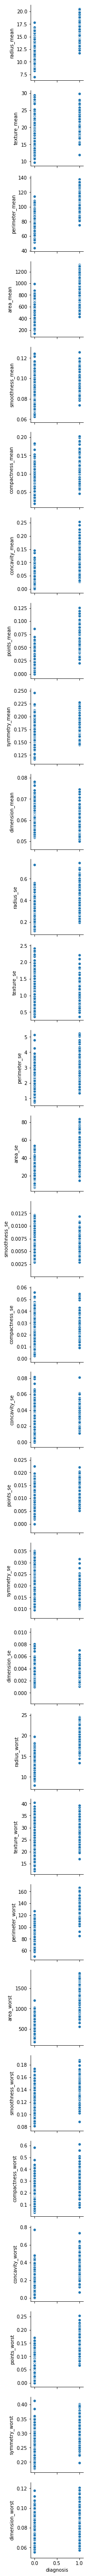

In [313]:
sns.pairplot(data=bc_dataFrame_out,x_vars=["diagnosis"],y_vars=independentCols)

# Q8. Divide the data set into training and test data set and build a KNN model.

In [314]:
x = np.array(df_features)
x.shape

(398, 30)

In [315]:
y = np.array(df_labels)
y.shape

(398,)

In [316]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [317]:
NNH = KNeighborsClassifier(n_neighbors= 5)  #5 is just given randomly - K

In [318]:
# Call Nearest Neighbour algorithm

NNH.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [319]:
#Do the predication
predicted_labels = NNH.predict(x_test)
NNH.score(x_test, y_test)

0.9333333333333333

In [320]:
# calculate confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predicted_labels))

[[84  1]
 [ 7 28]]


# Q9. Print the optimal value of K using Mis-classification error and the corresponding accuracy for the model

In [321]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating list of K for KNN
myList = list(range(1,21))
# empty list that will hold cv scores
cv_scores = []
k_neighbors = []
# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)
    
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 5


# Q10 Plot misclassification error vs k (with k value on X-axis) using matplotlib.

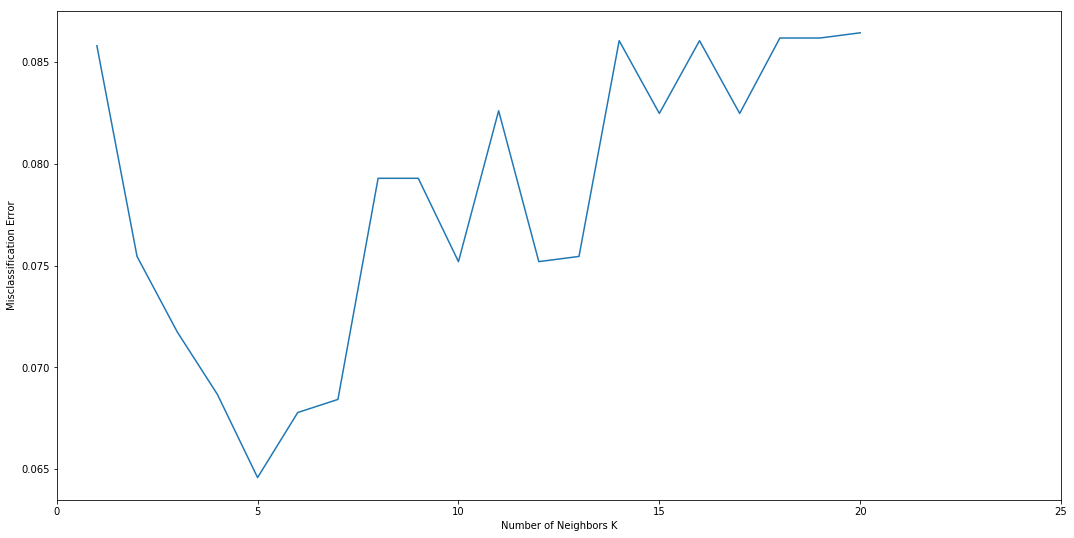

In [322]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()